In [1]:
#pip install qiskit numpy matplotlib pylatexenc
API_KEY = Your API Key

In [2]:
import qiskit
%matplotlib inline
#for jupyter
circuit = qiskit.QuantumCircuit(2, 2) #two qubits at zero
circuit.x(0) #apply a not gate over the 0th qubit
circuit.h(1) #give the 1th qubit superposition
circuit.y(1) #rotate the 1st qubit pi radians around the y axis
circuit.z(1) #rotate the 1st qubit pi radians around the z axis
circuit.ch(1, 0) #give the 0th qubit superposition if the 1st is one
circuit.cx(0, 1) #apply a not gate over the 1st if the 0th is one
circuit.cy(0, 1) #rotate the 1st qubit pi radians around the y axis if the 0th is one
circuit.cz(0, 1) #rotate the 1st qubit pi radians around the z axis if the 0th is one
circuit.rx(42, 1) #rotate the 1st qubit 42 radians around the x axis
circuit.ry(42, 1) #rotate the 1st qubit 42 radians around the y axis
circuit.crx(42, 0, 1) #rotate the 1st qubit 42 radians around the x axis if the 0th is one
circuit.rz(42, 1) #rotate the 1st qubit 42 radians around the z axis
circuit.crz(42, 0, 1) #rotate the 1st qubit 42 radians around the z axis if the 0th is one
circuit.power(3) #raise the circuit to third power
circuit.swap(0, 1) #swaps the values of the 0th and 1st qubits
circuit.cry(42, 0, 1) #rotate the 1st qubit 42 radians around the y axis if the 0th is one
circuit.sdg(1) #rotate the 1st qubit pi/2 radians around the z axis
circuit.sx(0) #apply a square root not gate if apply twice is like a not on the 0th qubit
circuit.csx(0, 1) #apply a square root not gate if apply twice is like a not on the 1st qubit if the 0th is one
circuit.sxdg(0) #apply the inverse of the square root not gate
circuit.t(1) #rotate the 1st qubit pi/4 radians around the z axis
#circuit.reset(1) #reset the 1st qubit
#circuit.cswap(2, 0, 1) #swaps the values of the 0th and 1st qubits if the 2nd is one
#circuit.mcrx(42, (0, 2, ...), 1) #rotate the 1st qubit 42 radians around the x axis if the 0th and 2nd are one
#circuit.mcry(42, (0, 2, ...), 1) #rotate the 1st qubit 42 radians around the y axis if the 0th and 2nd are one
#circuit.mcrz(42, (0, 2, ...), 1) #rotate the 1st qubit 42 radians around the z axis if the 0th and 2nd are one
#circuit.ccx(0, 1, 2) #apply a not gate over the 2nd bit if the 0th and the 1st are one
#circuit.mcx((0, 1, ...), 2) #apply a not gate over the 2nd bit if the 0th and the 1st are one
circuit.measure([0, 1], [0, 1])
circuit.draw()

┌───┐          ┌───┐                                                     »
q_0: ┤ X ├──────────┤ H ├──■────■───■───────────────────────────────────■─────»
     ├───┤┌───┐┌───┐└─┬─┘┌─┴─┐┌─┴─┐ │ ┌────────┐┌────────┐┌────────┐┌───┴────┐»
q_1: ┤ H ├┤ Y ├┤ Z ├──■──┤ X ├┤ Y ├─■─┤ RX(42) ├┤ RY(42) ├┤ RZ(42) ├┤ RX(42) ├»
     └───┘└───┘└───┘     └───┘└───┘   └────────┘└────────┘└────────┘└────────┘»
c: 2/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«                             ┌────┐      ┌──────┐┌─┐   
«q_0: ────■─────────■──────X──┤ √X ├──■───┤ √XDG ├┤M├───
«     ┌───┴────┐┌───┴────┐ │ ┌┴────┤┌─┴──┐└┬───┬─┘└╥┘┌─┐
«q_1: ┤ RY(42) ├┤ RZ(42) ├─X─┤ SDG ├┤ √X ├─┤ T ├───╫─┤M├
«     └────────┘└────────┘   └─────┘└────┘ └───┘   ║ └╥┘
«c: 2/═════════════════════════════════════════════╩══╩═
«                                                  0  1

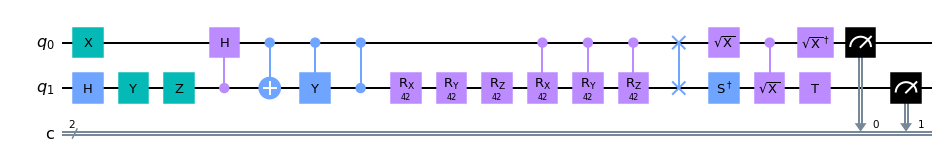

In [3]:
circuit.draw(output = 'mpl')

In [4]:
from qiskit import IBMQ
IBMQ.save_account(API_KEY, overwrite = True)
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [5]:
from qiskit.tools.monitor import job_monitor
provider = IBMQ.get_provider('ibm-q')
backends = provider.backends()
qubits = []
for backend in backends:
    try: qubits += [len(backend.properties().qubits)]
    except: qubits += [0]
backend = provider.get_backend(backends[qubits.index(max(qubits))].name())
job = qiskit.execute(circuit, backend = backend, shots = 10) #ten examples
job_monitor(job)

Job Status: job has successfully run


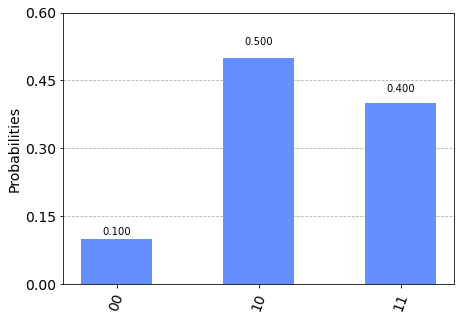

In [6]:
from qiskit.visualization import plot_histogram
result = job.result()
counts = result.get_counts(circuit)
plot_histogram([counts])